In [16]:
# Import dependencies
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt 
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import seaborn as sns
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from string import punctuation
from textblob import TextBlob

In [2]:
# Import celebrity twitter data csv
filepath = Path('Resources/celebrity_mbti.csv')
celebrity_df = pd.read_csv(filepath)
celebrity_df

,type,posts
0,INTJ,"""SpaceX team is doing great work! One day, the..."
1,ENTP,"""To all the Grads of 2020, you Chosen Ones! Pr..."
2,ESFP,"""What Lily is really thinking when Hannah pres..."


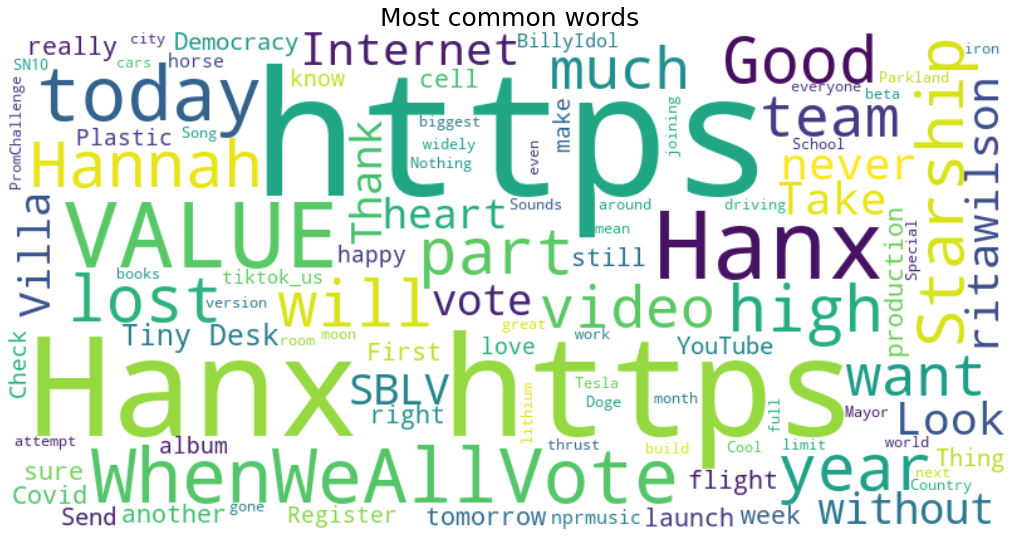

In [3]:
# Read the whole text
text = ' '.join(celebrity_df['posts'])

# Generate a word cloud image
stopwords = STOPWORDS
wordcloud = WordCloud(background_color='white', width=800, height=400, stopwords=stopwords, max_words=100, repeat=False, min_word_length=4).generate(text)

# Display the generated image:
plt.figure(figsize=(18,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
sns.set_context('talk')
plt.title('Most common words', fontsize=25)
plt.show()

In [4]:
import tweepy
from dotenv import load_dotenv
import os

In [5]:
load_dotenv()

True

In [6]:
consumer_key = os.getenv('consumer_key')
consumer_secret = os.getenv('consumer_secret')
access_token = os.getenv('access_token')
access_token_secret = os.getenv('access_token_secret')
type(access_token_secret)

str

In [7]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth,wait_on_rate_limit=True)

In [8]:
username = 'jack'
user_MBTI = 'ISTP'
count = 50
tweets = tweepy.Cursor(api.user_timeline,id=username).items(count)
tweets_list = [tweet.text for tweet in tweets]
tweets_list

['RT @AmritaAhuja: 🌎💚 commited to doing our part',
 '@aismallard @GiveDirectly No',
 'RT @Square: Today we published our 2020 Corporate Social Responsibility Report. \n\nWe’re committed to operating a responsible and sustainabl…',
 'Ending this March 21st\n\nWill immediately convert proceeds to #Bitcoin\n\nAnd send to @GiveDirectly Africa Response',
 '@ConorOkus 💯',
 'RT @ConorOkus: Timechain &gt; Blockchain',
 'This bag is ♾ 🧡 https://t.co/wT8NXL5tqt',
 'Matt is incredible 🧡 https://t.co/OImdEaKnXE',
 'https://t.co/xCnWG9EqgD',
 'RT @sc: I said from the beginning that TIDAL was about more than just streaming music, and six years later, it has remained a platform that…',
 'More from us soon. In the meantime, here’s a playlist from Jay/@sc celebrating artists and the entrepreneurial spir… https://t.co/FgtCRz7Tfd',
 'I’m grateful for Jay’s vision, wisdom, and leadership. I knew TIDAL was something special as soon as I experienced… https://t.co/wzrRF31GU1',
 "To all of TIDAL's current lis

In [9]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [10]:
tweets_string = " ".join(tweets_list)
tweets_string = remove_emoji(tweets_string)
tweets_string

"RT @AmritaAhuja:  commited to doing our part @aismallard @GiveDirectly No RT @Square: Today we published our 2020 Corporate Social Responsibility Report. \n\nWe’re committed to operating a responsible and sustainabl… Ending this March 21st\n\nWill immediately convert proceeds to #Bitcoin\n\nAnd send to @GiveDirectly Africa Response @ConorOkus  RT @ConorOkus: Timechain &gt; Blockchain This bag is   https://t.co/wT8NXL5tqt Matt is incredible  https://t.co/OImdEaKnXE https://t.co/xCnWG9EqgD RT @sc: I said from the beginning that TIDAL was about more than just streaming music, and six years later, it has remained a platform that… More from us soon. In the meantime, here’s a playlist from Jay/@sc celebrating artists and the entrepreneurial spir… https://t.co/FgtCRz7Tfd I’m grateful for Jay’s vision, wisdom, and leadership. I knew TIDAL was something special as soon as I experienced… https://t.co/wzrRF31GU1 To all of TIDAL's current listeners and fans: THANK YOU for your loyalty and commitm

In [11]:
tweets_df = pd.DataFrame({
    'type': user_MBTI,
    'posts': [tweets_string]
})
tweets_df

,type,posts
0,ISTP,RT @AmritaAhuja: commited to doing our part @...


In [12]:
celebrity_df = celebrity_df.append(tweets_df, ignore_index=True)
celebrity_df

,type,posts
0,INTJ,"""SpaceX team is doing great work! One day, the..."
1,ENTP,"""To all the Grads of 2020, you Chosen Ones! Pr..."
2,ESFP,"""What Lily is really thinking when Hannah pres..."
3,ISTP,RT @AmritaAhuja: commited to doing our part @...


In [13]:
# add features:
celebrity_df['words_per_comment'] = celebrity_df['posts'].apply(lambda x: len(x.split())/50.0)
#celebrity_df['variance_of_word_counts'] = celebrity_df['posts'].apply(lambda x: var_row(x))

celebrity_df['http_per_comment'] = celebrity_df['posts'].apply(lambda x: x.count('http')/50.0)
celebrity_df['img_per_comment'] = celebrity_df['posts'].apply(lambda x: x.count('jpg')/50.0)

celebrity_df['qm_per_comment'] = celebrity_df['posts'].apply(lambda x: x.count('?')/50.0)
celebrity_df['excl_per_comment'] = celebrity_df['posts'].apply(lambda x: x.count('!')/50.0)
celebrity_df['ellipsis_per_comment'] = celebrity_df['posts'].apply(lambda x: x.count('...')/50.0)

celebrity_df['E'] = celebrity_df['type'].apply(lambda x: x.count('E'))
celebrity_df['I'] = celebrity_df['type'].apply(lambda x: x.count('I'))

celebrity_df['S'] = celebrity_df['type'].apply(lambda x: x.count('S'))
celebrity_df['N'] = celebrity_df['type'].apply(lambda x: x.count('N'))

celebrity_df['F'] = celebrity_df['type'].apply(lambda x: x.count('F'))
celebrity_df['T'] = celebrity_df['type'].apply(lambda x: x.count('T'))

celebrity_df['P'] = celebrity_df['type'].apply(lambda x: x.count('P'))
celebrity_df['J'] = celebrity_df['type'].apply(lambda x: x.count('J'))

celebrity_df.head()

,type,posts,words_per_comment,http_per_comment,img_per_comment,qm_per_comment,excl_per_comment,ellipsis_per_comment,E,I,S,N,F,T,P,J
0,INTJ,"""SpaceX team is doing great work! One day, the...",8.86,0.14,0.0,0.02,0.16,0.00,0,1,0,1,0,1,0,1
1,ENTP,"""To all the Grads of 2020, you Chosen Ones! Pr...",15.24,0.76,0.0,0.18,1.42,0.02,1,0,0,1,0,1,1,0
2,ESFP,"""What Lily is really thinking when Hannah pres...",10.94,0.74,0.0,0.08,0.80,0.02,1,0,1,0,1,0,1,0
3,ISTP,RT @AmritaAhuja: commited to doing our part @...,13.18,0.50,0.0,0.00,0.12,0.00,0,1,1,0,0,1,1,0


In [14]:
def clean_phrase(phrase):
  '''
  removes links and special characters using simple regex statements.
  '''
  return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", phrase).split())

def get_sentiment(phrase):
  """
  classifies text as positive, neutral, or negative using textblob's sentiment method
  """
  analysis = TextBlob(clean_phrase(phrase))
  if analysis.sentiment.polarity > 0:
    return 'positive'
  elif analysis.sentiment.polarity == 0:
    return 'neutral'
  else:
    return 'negative'
                  
for index, row in celebrity_df.iterrows():
  #if (index%1000) == 0:
    #print index
  #df_train.loc[index,'sentiment'] = get_sentiment(df_train.iloc[i]['posts'])
  celebrity_df.loc[index,'sentiment'] = TextBlob(clean_phrase(celebrity_df.iloc[index]['posts'])).sentiment.polarity

celebrity_df.head()

,type,posts,words_per_comment,http_per_comment,img_per_comment,qm_per_comment,excl_per_comment,ellipsis_per_comment,E,I,S,N,F,T,P,J,sentiment
0,INTJ,"""SpaceX team is doing great work! One day, the...",8.86,0.14,0.0,0.02,0.16,0.00,0,1,0,1,0,1,0,1,0.187692
1,ENTP,"""To all the Grads of 2020, you Chosen Ones! Pr...",15.24,0.76,0.0,0.18,1.42,0.02,1,0,0,1,0,1,1,0,0.235577
2,ESFP,"""What Lily is really thinking when Hannah pres...",10.94,0.74,0.0,0.08,0.80,0.02,1,0,1,0,1,0,1,0,0.134681
3,ISTP,RT @AmritaAhuja: commited to doing our part @...,13.18,0.50,0.0,0.00,0.12,0.00,0,1,1,0,0,1,1,0,0.259340


In [17]:
Stop = stopwords.words('english')
lemmatizer = WordNetLemmatizer()

In [18]:
personality_types = [x.lower() for x in celebrity_df["type"].unique()]
stop_words = ["hmm", "b", "c", "ahh"]

In [19]:
def tokenizer(text):
    """Tokenizes text."""
    sw = set(Stop)
    regex = re.compile("[^a-zA-Z ]")
    regex2 = re.compile("[…\+,'’]")
    post = re.sub(r'''https?:\/\/[^| ]+''', '', text, flags=re.MULTILINE)
    post = re.sub(r'''[0-9]+''', '', post, flags=re.MULTILINE) 
    
    # This would have removed most of the links but probably not all 
    post=post.replace('|||'," ") 

    # Remove puntuations 
    puncs1=['@','#','$','%','^','~','&','*','(',')','-','_','+','=','{','}','[',']','|','\\','"',"'",';',':','<','>','/', ',','.','?','!','\n']
    for punc in puncs1:
        post=post.replace(punc,' ') 

    # Remove extra white spaces
    text=re.sub( '\s+', ' ', post ).strip()
    text = regex2.sub('', text)
    words = word_tokenize(text)
    words = [x.lower() for x in words]
    words = [x for x in words if x not in punctuation]
    words = [x for x in words if x not in personality_types]
    words = [x for x in words if x not in stop_words]

    return [lemmatizer.lemmatize(word) for word in words if word not in sw]

In [20]:
celebrity_df["tokens"] = celebrity_df["posts"].apply(tokenizer)
celebrity_df['text'] = celebrity_df['tokens'].apply(lambda x: ' '.join(x))
celebrity_df

,type,posts,words_per_comment,http_per_comment,img_per_comment,qm_per_comment,excl_per_comment,ellipsis_per_comment,E,I,S,N,F,T,P,J,sentiment,tokens,text
0,INTJ,"""SpaceX team is doing great work! One day, the...",8.86,0.14,0.0,0.02,0.16,0.00,0,1,0,1,0,1,0,1,0.187692,"[spacex, team, great, work, one, day, true, me...",spacex team great work one day true measure su...
1,ENTP,"""To all the Grads of 2020, you Chosen Ones! Pr...",15.24,0.76,0.0,0.18,1.42,0.02,1,0,0,1,0,1,1,0,0.235577,"[grad, chosen, one, print, sheepskin, hanx, da...",grad chosen one print sheepskin hanx day skyli...
2,ESFP,"""What Lily is really thinking when Hannah pres...",10.94,0.74,0.0,0.08,0.80,0.02,1,0,1,0,1,0,1,0,0.134681,"[lily, really, thinking, hannah, press, send, ...",lily really thinking hannah press send another...
3,ISTP,RT @AmritaAhuja: commited to doing our part @...,13.18,0.50,0.0,0.00,0.12,0.00,0,1,1,0,0,1,1,0,0.259340,"[rt, amritaahuja, commited, part, aismallard, ...",rt amritaahuja commited part aismallard givedi...


In [21]:
celebrity_df["is_Extrovert"] = celebrity_df["type"].apply(
    lambda x: 1 if x[0] == "E" else 0
)
celebrity_df["is_Sensing"] = celebrity_df["type"].apply(
    lambda x: 1 if x[1] == "S" else 0
)
celebrity_df["is_Thinking"] = celebrity_df["type"].apply(
    lambda x: 1 if x[2] == "T" else 0
)
celebrity_df["is_Judging"] = celebrity_df["type"].apply(
    lambda x: 1 if x[3] == "J" else 0
)

celebrity_df

,type,posts,words_per_comment,http_per_comment,img_per_comment,qm_per_comment,excl_per_comment,ellipsis_per_comment,E,I,...,T,P,J,sentiment,tokens,text,is_Extrovert,is_Sensing,is_Thinking,is_Judging
0,INTJ,"""SpaceX team is doing great work! One day, the...",8.86,0.14,0.0,0.02,0.16,0.00,0,1,...,1,0,1,0.187692,"[spacex, team, great, work, one, day, true, me...",spacex team great work one day true measure su...,0,0,1,1
1,ENTP,"""To all the Grads of 2020, you Chosen Ones! Pr...",15.24,0.76,0.0,0.18,1.42,0.02,1,0,...,1,1,0,0.235577,"[grad, chosen, one, print, sheepskin, hanx, da...",grad chosen one print sheepskin hanx day skyli...,1,0,1,0
2,ESFP,"""What Lily is really thinking when Hannah pres...",10.94,0.74,0.0,0.08,0.80,0.02,1,0,...,0,1,0,0.134681,"[lily, really, thinking, hannah, press, send, ...",lily really thinking hannah press send another...,1,1,0,0
3,ISTP,RT @AmritaAhuja: commited to doing our part @...,13.18,0.50,0.0,0.00,0.12,0.00,0,1,...,1,1,0,0.259340,"[rt, amritaahuja, commited, part, aismallard, ...",rt amritaahuja commited part aismallard givedi...,0,1,1,0


In [22]:
cols = list(celebrity_df.columns.values)
cols

['type',
 'posts',
 'words_per_comment',
 'http_per_comment',
 'img_per_comment',
 'qm_per_comment',
 'excl_per_comment',
 'ellipsis_per_comment',
 'E',
 'I',
 'S',
 'N',
 'F',
 'T',
 'P',
 'J',
 'sentiment',
 'tokens',
 'text',
 'is_Extrovert',
 'is_Sensing',
 'is_Thinking',
 'is_Judging']

In [23]:
celebrity_df = celebrity_df.drop(columns = ['posts', 'tokens','E', 'I', 'S', 'N', 'F', 'T', 'P', 'J',])
celebrity_df

,type,words_per_comment,http_per_comment,img_per_comment,qm_per_comment,excl_per_comment,ellipsis_per_comment,sentiment,text,is_Extrovert,is_Sensing,is_Thinking,is_Judging
0,INTJ,8.86,0.14,0.0,0.02,0.16,0.00,0.187692,spacex team great work one day true measure su...,0,0,1,1
1,ENTP,15.24,0.76,0.0,0.18,1.42,0.02,0.235577,grad chosen one print sheepskin hanx day skyli...,1,0,1,0
2,ESFP,10.94,0.74,0.0,0.08,0.80,0.02,0.134681,lily really thinking hannah press send another...,1,1,0,0
3,ISTP,13.18,0.50,0.0,0.00,0.12,0.00,0.259340,rt amritaahuja commited part aismallard givedi...,0,1,1,0


In [48]:
#celebrity_df.to_csv(r'Resources/celebrity_clean.csv', index=False)